In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import spectrogram

from synthetic_signal import (get_random_walk_frequency, 
                              get_random_walk_chirp_signal)

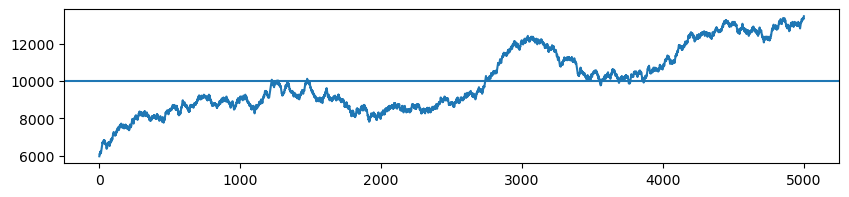

In [2]:
n_steps = 5001
frequency_base = 10_000
walk_scale = 50

frequency = get_random_walk_frequency(n_steps, frequency_base, walk_scale)
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
ax.plot(frequency)
ax.axhline(frequency.mean())

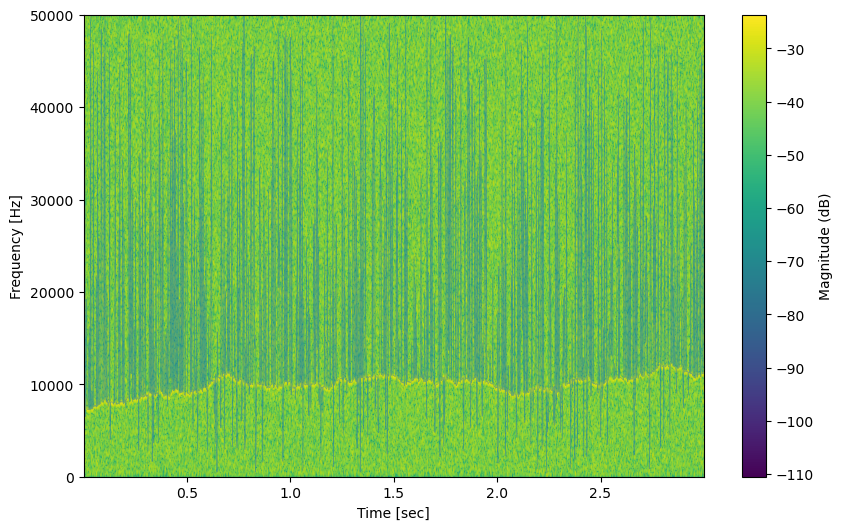

In [53]:
sampling_frequency = 1_000_000
duration = 3

n_steps = 5001
frequency_base = 10_000
walk_scale = 50

frequency = get_random_walk_frequency(n_steps, frequency_base, walk_scale)
signal = get_random_walk_chirp_signal(duration, frequency, sampling_frequency)

noise_std = 3
noise = noise_std * np.random.randn(len(signal)) 
signal += noise

frequencies, times_, Sxx = spectrogram(signal[::10], sampling_frequency // 10,  nfft=10000)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
cax = ax.pcolormesh(times_, frequencies, 10 * np.log10(Sxx), shading='gouraud')

fmax = frequencies[Sxx.argmax(axis=0)]
# print(fmax)
ax.plot(times_, fmax, linewidth=.5, alpha=.5)

fig.colorbar(cax, label='Magnitude (dB)')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
fig.show()
fig.savefig('plots/synthetic_faint_signal.png', transparent=False, bbox_inches='tight', dpi=200)

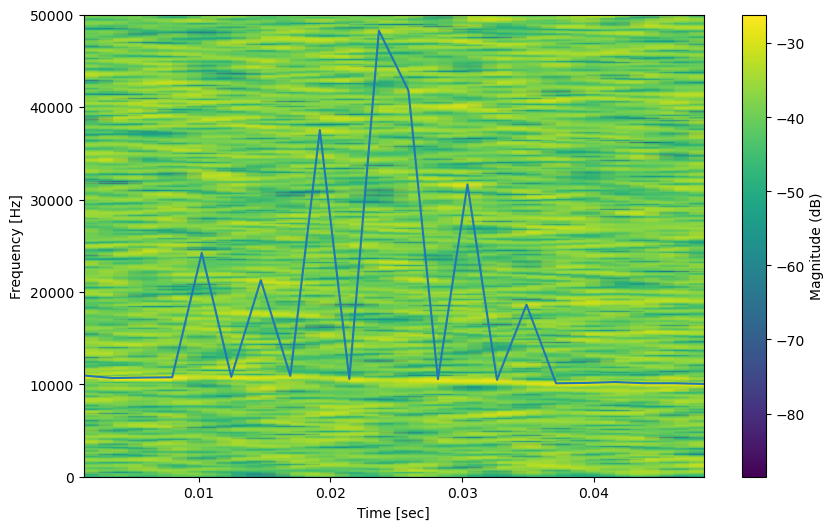

In [55]:
frequencies, times_, Sxx = spectrogram(signal[1_500_000:1_550_000:10], sampling_frequency // 10,  nfft=10000)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
cax = ax.pcolormesh(times_, frequencies, 10 * np.log10(Sxx), shading='gouraud')

fig.colorbar(cax, label='Magnitude (dB)')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
fmax = frequencies[Sxx.argmax(axis=0)]
# print(fmax)
ax.plot(times_, fmax)
fig.show()
fig.savefig('plots/synthetic_faint_signal.png', transparent=False, bbox_inches='tight', dpi=200)